In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [188]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [190]:
pd.unique(df[['Species']].values.ravel())

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [191]:
target_encoded_values = {"Species": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica" : 2}}
df = df.replace(target_encoded_values)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [192]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [193]:
x = df.iloc[:, :1]
x.head()

,SepalLengthCm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [194]:
y = df.iloc[:, 3:4]
y.head()

,PetalWidthCm
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [195]:
def plotVectors(vecs, cols):
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)
    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i])

# 1. Principal Component Analysis using Correlation Matrix

## Performing the PCA on Two Features

### 1. Standardization

In [196]:
x = np.array(x).flatten()
y = np.array(y).flatten()

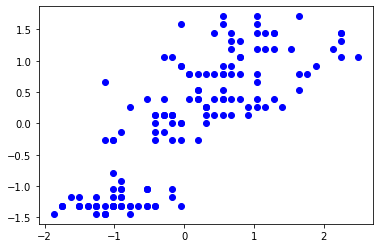

In [197]:
x = (x - np.mean(x))/(np.std(x))
y = (y - np.mean(y))/(np.std(y))
vecs = []
for i in range(len(x)):
    vecs.append((x[i], y[i]))
for items in vecs:
    vec = np.array(items)
    plt.scatter(vec[0], vec[1], c='b')

### 2. Co-Variance Matrix for the variables X and Y 

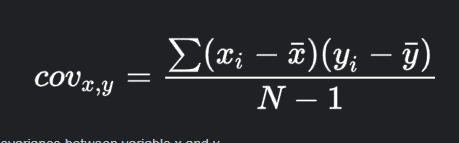

In [198]:
covXX = 0
covYY = 0
covXY = 0
covYX = 0
for i in range(len(x)):
    covXX += (x[i] - np.mean(x))*(x[i] - np.mean(x))
    covXY += (x[i] - np.mean(x))*(y[i] - np.mean(y))
    covYX += (y[i] - np.mean(y))*(x[i] - np.mean(x))
    covYY += (y[i] - np.mean(y))*(y[i] - np.mean(y))
covXX = covXX/len(x)
covXY = covXY/len(x)
covYX = covYX/len(x)
covYY = covYY/len(x)

covMatrix = np.array([[covXX,covXY],[covYX,covYY]])

print(covMatrix)

[[1.         0.81795363]
 [0.81795363 1.        ]]


In [199]:
eig_val, eig_vec = np.linalg.eig(covMatrix)
print(eig_val, "\n")
print(eig_vec)

[0.18204637 1.81795363] 

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


(-1.0, 1.0)

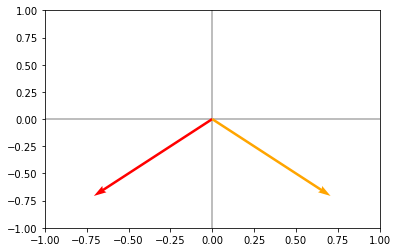

In [200]:
plotVectors([eig_vec[0].flatten(), eig_vec[1].flatten()], cols=['red', 'orange'])
plt.ylim(-1, 1)
plt.xlim(-1, 1)

In [201]:
pca1 = eig_val[1] / (eig_val[0] + eig_val[1])
pca2 = eig_val[0] / (eig_val[0] + eig_val[1])
print(pca1*100, pca2*100)

90.8976816684582 9.102318331541802


Since the data in the second eigen vector consists more significance than the first vector, we create a new vector with the second vector as it's first component and the first vector as it's second.

(2, 2) (2, 150)


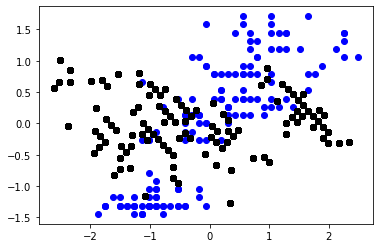

In [202]:
ds = np.array(vecs)
print(eig_vec.shape, ds.T.shape)
PCA_DS = np.matmul(eig_vec, ds.T)
PCA_DS = PCA_DS.T
for vec in vecs:
    plt.scatter(vec[0], vec[1], color='blue')
for array in PCA_DS:
    plt.scatter(PCA_DS[:, 0], PCA_DS[:, 1], color='black')

In [203]:
PCA_DS = pd.DataFrame(PCA_DS)
PCA_DS.cov()

,0,1
0,1.830155e+00,5.543664e-16
1,5.543664e-16,1.832682e-01


# Performing PCA on the whole Dataset

### 1. Standardizing the Whole Dataset

In [204]:
features = df.iloc[:, 0:4]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [205]:
features = (features - features.mean()) / features.std()
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


### 2. Generating a covariance matrix.

In [206]:
cov_matrix = features.cov()
print(cov_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


In [207]:
cov_matrix = np.array(cov_matrix)
cov_matrix.shape

(4, 4)

In [208]:
print(cov_matrix)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


### 3. Finding the Eigen Values and The Eigen Vectors of the Above Co-Variance Matrix 

In [209]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print(f'The eigen values are given as:\n{eig_values}\n\nThe Eigen Vectors are given as:\n{eig_vectors}\n\nWhere each column represents a single eigen vector.')

The eigen values are given as:
[2.91081808 0.92122093 0.14735328 0.02060771]

The Eigen Vectors are given as:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Where each column represents a single eigen vector.


So, we transpose the matrix, to get the values represented in rows.

In [210]:
eig_vectors = eig_vectors.T
print(eig_vectors)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


(-1.0, 1.0)

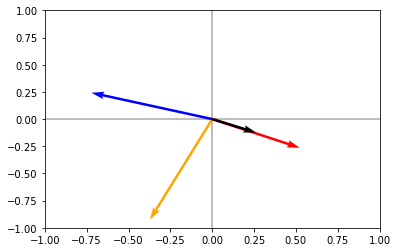

In [211]:
plotVectors([eig_vectors[0].flatten(), eig_vectors[1].flatten(), eig_vectors[2], eig_vectors[3]], cols=['red', 'orange', 'blue', 'black'])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

Now we see the significance of each eigen value for the entire dataset.

In [212]:
indices = []
for i in range(len(eig_values)):
    sig_n = eig_values[i] / np.sum(eig_values) * 100
    print(f'The significance of PCA{i} is: {round(sig_n, 2)}%')
    if sig_n > 5:
        indices.append(i)
PCAs = eig_vectors[indices]

The significance of PCA0 is: 72.77%
The significance of PCA1 is: 23.03%
The significance of PCA2 is: 3.68%
The significance of PCA3 is: 0.52%


So the component which is less than 5%, we remove the eigen vector of that particular eigen value.

In [213]:
print(PCAs)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]]


We watch the first two dimensions of the two Eigen Vectors (**Principal Component Vectors**)

(-1.0, 1.0)

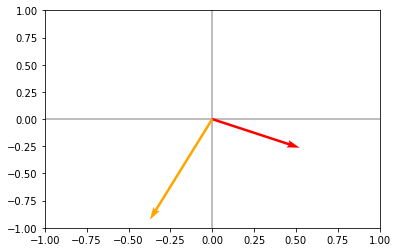

In [214]:
plotVectors([PCAs[0].flatten(), PCAs[1].flatten()], cols=['red', 'orange'])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

### 4. Now Finally we multiply our Eigen Vectors lists with our Original Feature Matrices

In [215]:
print(PCAs.shape, features.shape)

(2, 4) (150, 4)


In [216]:
PCA_features = np.matmul(PCAs, features.T)
PCA_features = PCA_features.T
print(PCA_features.shape)

(150, 2)


In [217]:
PCA_features.head()

,0,1
0,-2.256981,-0.504015
1,-2.079459,0.653216
2,-2.360044,0.317414
3,-2.296504,0.573447
4,-2.380802,-0.672514


In [218]:
PCA_features = PCA_features.rename(columns={0: "PC1", 1:"PC2"})
PCA_features = pd.concat([PCA_features, df['Species']], axis=1)
PCA_features.head()

,PC1,PC2,Species
0,-2.256981,-0.504015,0
1,-2.079459,0.653216,0
2,-2.360044,0.317414,0
3,-2.296504,0.573447,0
4,-2.380802,-0.672514,0


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

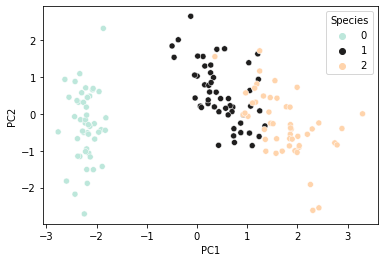

In [219]:
import seaborn as sns

sns.scatterplot(data=PCA_features, x = "PC1", y = "PC2", palette='icefire', hue="Species")

# Applying Singular Value Decomposition for Finding out the Principle Components

### Expression for SVD:

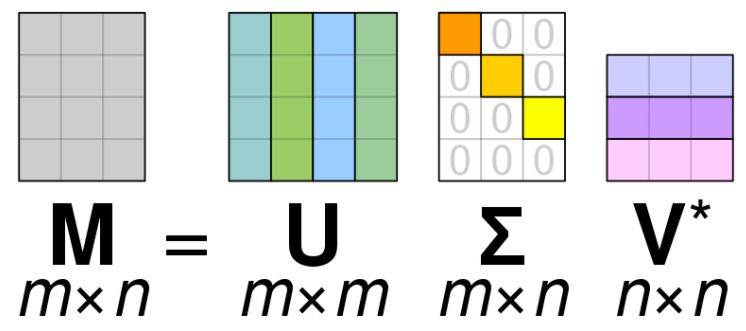

In [220]:
features = features = df.iloc[:, 0:4]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


A'A = V &^2 V' <br>
A A'= U &^2 U'
#### Finally,
### A = U & V'

In [221]:
features = np.array(features)
features.shape

(150, 4)

We can see that our feature matrix is a rectangular matrix, now we find out the **A'A**
of our features matrix and call it M.
We also find **AA'** of the feature matrix and call it N.

In [236]:
M = np.matmul(features.T, features)
N = np.matmul(features, features.T)
print(M.shape, N.shape)

(4, 4) (150, 150)


In [237]:
print(M)

[[5223.85 2670.98 3484.25 1127.65]
 [2670.98 1427.05 1673.91  531.53]
 [3484.25 1673.91 2583.    868.97]
 [1127.65  531.53  868.97  302.3 ]]


In [238]:
print(N)

[[40.26 37.49 37.03 ... 51.33 51.54 48.09]
 [37.49 35.01 34.49 ... 48.53 48.6  45.41]
 [37.03 34.49 34.06 ... 47.31 47.5  44.32]
 ...
 [51.33 48.53 47.31 ... 82.29 83.18 77.47]
 [51.54 48.6  47.5  ... 83.18 84.45 78.46]
 [48.09 45.41 44.32 ... 77.47 78.46 73.06]]


In [239]:
lam_M, V = np.linalg.eig(M)
lam_N, U = np.linalg.eig(N)

In [241]:
print(lam_M)
lam_M.shape

[9.20653060e+03 3.14103073e+02 1.20360193e+01 3.53031167e+00]


(4,)

In [226]:
V = V.T
print(V)

[[ 0.75116805  0.37978837  0.51315094  0.16787934]
 [ 0.28583096  0.54488976 -0.70889874 -0.34475845]
 [ 0.49942378 -0.67502499 -0.05471983 -0.54029889]
 [ 0.32345496 -0.32124324 -0.48077482  0.74902286]]


In [255]:
indices = []
for i in range(len(lam_M)):
    sig_n = lam_M[i] / np.sum(lam_M) * 100
    print(f'The significance of PCA{i} is: {round(sig_n, 2)}%')
    if sig_n > 2:
        indices.append(i)
PCAs = V[indices]

The significance of PCA0 is: 96.54%
The significance of PCA1 is: 3.29%
The significance of PCA2 is: 0.13%
The significance of PCA3 is: 0.04%


In [256]:
print(PCAs)

[[ 0.75116805  0.28583096  0.49942378  0.32345496]
 [ 0.37978837  0.54488976 -0.67502499 -0.32124324]]


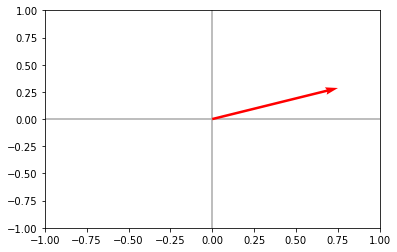

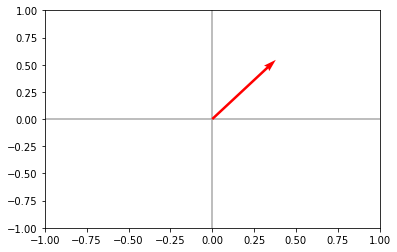

In [257]:
for vectors in PCAs:
    plotVectors([vectors], cols=['red'])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

In [258]:
print(PCAs.shape, features.shape)

(2, 4) (150, 4)


In [259]:
PCA_features = np.matmul(PCAs, features.T)
PCA_features = PCA_features.T
print(PCA_features.shape)

(150, 2)


In [261]:
PCA_features = pd.DataFrame(PCA_features, columns = ['PA_1', 'PA_2'])
PCA_features.head()

,PA_1,PA_2
0,5.595250,2.834751
1,5.302101,2.486349
2,5.159091,2.586871
3,5.155276,2.359399
4,5.548716,2.851261


In [262]:
PCA_features = pd.concat([PCA_features, df['Species']], axis=1)
PCA_features.head()

,PA_1,PA_2,Species
0,5.595250,2.834751,0
1,5.302101,2.486349,0
2,5.159091,2.586871,0
3,5.155276,2.359399,0
4,5.548716,2.851261,0


<AxesSubplot:xlabel='PA_1', ylabel='PA_2'>

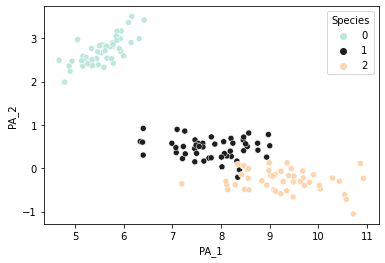

In [264]:
sns.scatterplot(data=PCA_features, x = "PA_1", y = "PA_2", palette='icefire', hue="Species")